In [17]:
from fipy import Variable, FaceVariable, CellVariable, Grid1D, Grid2D, \
NthOrderBoundaryCondition, ExplicitDiffusionTerm, TransientTerm, DiffusionTerm, Viewer,PowerLawConvectionTerm,ImplicitSourceTerm
from fipy.tools import numerix
from fipy import DefaultSolver
import numpy as np
import math

import numpy as np
import matplotlib.pyplot as plt
import torch
import math


In [18]:
L = 1.
T = 1.
alpha = 1
Q0 = 1
omega= 1
nx = 100
ny = 100
nt = 1000
dx = L/nx
dy = L/ny
dt = T/nt
mesh = Grid2D(nx=nx, dx=dx, dy=dy, ny = ny)
C = 1
m = 3
t0 = 0.
valueLeft = 0
valueTop = 0
valueBot = 0
valueRight = 0
timeStepDuration = T/nt
steps = nt

In [19]:
x = mesh.cellCenters[0]

def ic_func(x):
    return 0

IC = ic_func(x)
phi = CellVariable(name="solution variable",
                   mesh=mesh,
                   value=IC)


phi.constrain(valueLeft,where=mesh.facesLeft)
phi.constrain(valueRight, where= mesh.facesRight)
phi.constrain(valueTop, where=mesh.facesBottom)
phi.constrain(valueBot, where=mesh.facesTop)
time = Variable(name = 'time', value = IC)
eqX = (TransientTerm(coeff = 1)
      == DiffusionTerm(coeff = alpha) + Q0*(1+np.cos(omega*time)))

from builtins import range
solver = DefaultSolver()


In [20]:
U_fem = []

for step in range(steps):
   
    
    
    U_fem.append(np.array(phi))
    
    npx = torch.from_numpy(np.array(x))
    
    time.setValue(dt*step)

    eqX.solve(var=phi,
              dt=timeStepDuration,
              #boundaryConditions = BCs,
              solver = solver)
U_fem = np.array(U_fem)

/home/ivan/MEPHI/nauchka/xde/lib/python3.10/site-packages/fipy/terms/term.py:192: UserWarning: sweep() or solve() are likely to produce erroneous results when `var` does not contain floats.
  solver = self._prepareLinearSystem(var, solver, boundaryConditions, dt)
/home/ivan/MEPHI/nauchka/xde/lib/python3.10/site-packages/fipy/terms/term.py:120: UserWarning: sweep() or solve() are likely to produce erroneous results when `var` does not contain floats.
  self._checkVar(var)


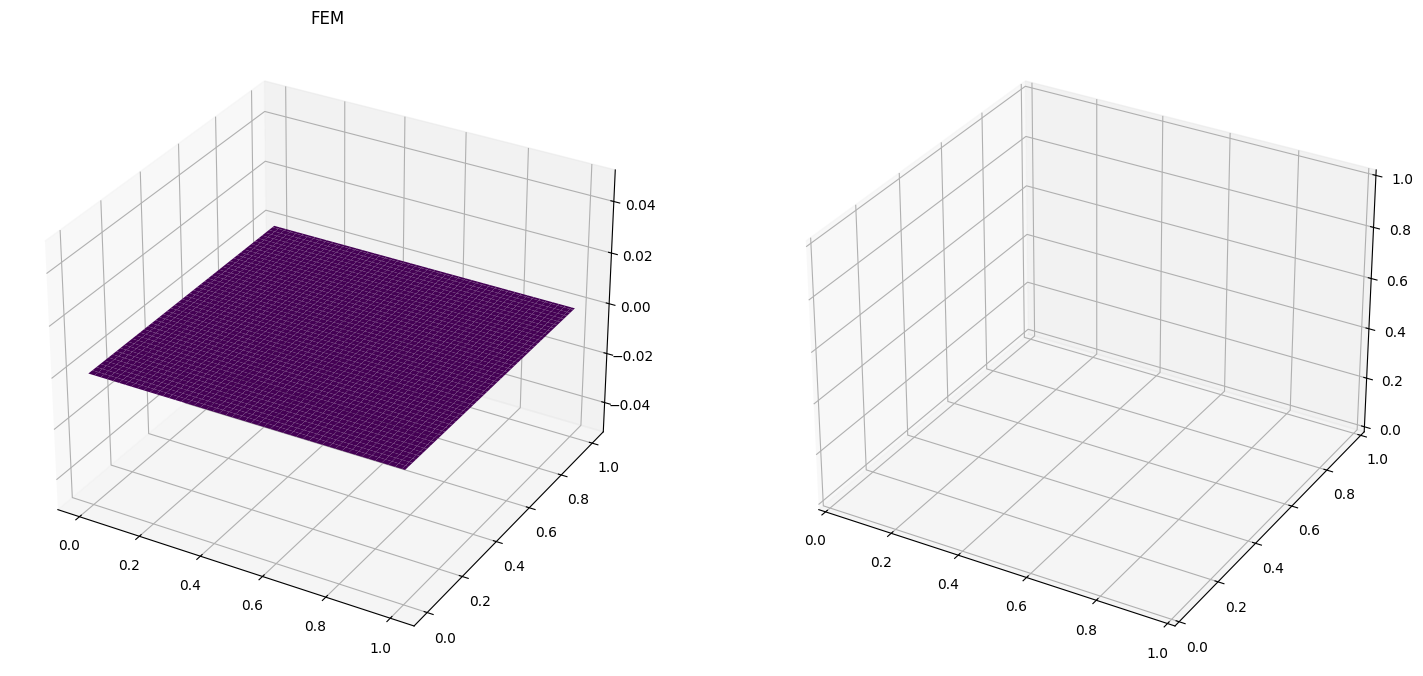

In [21]:
import matplotlib.pyplot as plt
Ys = np.linspace(0,L,ny)
Xs = np.linspace(0,L,nx)
XX,YY = np.meshgrid(Xs,Ys)
fig = plt.figure(figsize=(18,18))
ax = fig.add_subplot(1,2,1, projection = '3d')

ax.plot_surface(XX,YY,U_fem[0].reshape(100,100),rcount=80, ccount=80, cmap="viridis", edgecolor="none")
ax.set_title('FEM')
ax = fig.add_subplot(1,2,2, projection = '3d')

